In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('/home/kuba/wakacje/machine_lerning/train.csv')
train_data = np.array(train_data)

In [3]:
np.random.shuffle(train_data)
x_train, y_train = np.array(train_data)[:36000,1:], np.array(train_data)[:36000,0]
x_test, y_test = np.array(train_data)[36000:,1:], np.array(train_data)[36000:,0]

In [4]:
x_train.shape

(36000, 784)

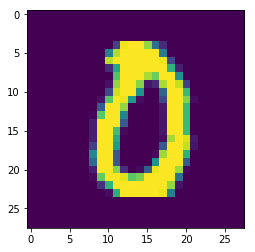

In [5]:
im = x_train[0].reshape(28,28)
plt.imshow(im)

In [6]:
# let's normalize our data 
x_train = x_train / 255
x_test  = x_test  / 255

In [18]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(216, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(216, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10,  activation = tf.nn.softmax)])


In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
36000/36000 [==============================] - 3s 75us/sample - loss: 0.2495 - acc: 0.9263
Epoch 2/15
36000/36000 [==============================] - 3s 73us/sample - loss: 0.1005 - acc: 0.9681
Epoch 3/15
36000/36000 [==============================] - 4s 101us/sample - loss: 0.0640 - acc: 0.9803
Epoch 4/15
36000/36000 [==============================] - 3s 75us/sample - loss: 0.0478 - acc: 0.9845
Epoch 5/15
36000/36000 [==============================] - 3s 74us/sample - loss: 0.0375 - acc: 0.9878
Epoch 6/15
36000/36000 [==============================] - 3s 75us/sample - loss: 0.0298 - acc: 0.9904
Epoch 7/15
36000/36000 [==============================] - 3s 74us/sample - loss: 0.0262 - acc: 0.9913
Epoch 8/15
36000/36000 [==============================] - 3s 75us/sample - loss: 0.0186 - acc: 0.9931
Epoch 9/15
36000/36000 [==============================] - 3s 76us/sample - loss: 0.0210 - acc: 0.9931
Epoch 10/15
36000/36000 [==============================] - 3s 75us/sample - loss:

In [21]:
model.evaluate(x_test,y_test)

6000/6000 [==============================] - 0s 34us/sample - loss: 0.1366 - acc: 0.9765


[0.13664465933605244, 0.9765]

In [23]:
kaggle_data = pd.read_csv('./Downloads/test.csv',header=None)

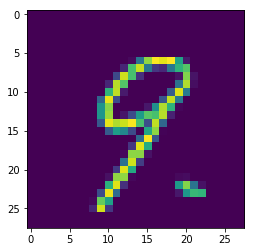

In [49]:
kaggle_data_ = np.array(kaggle_data)
kaggle_data_ = kaggle_data_[1:,:]
kaggle_data_ = np.array(kaggle_data_, dtype = int)
im = kaggle_data_[2].reshape(28,28)
plt.imshow(im)

In [25]:
X = kaggle_data_
X = X / 255
X[0].shape

(784,)

In [50]:
out = model.predict(X)
out = np.argmax(out, axis = 1)
out.shape

(28000,)

In [64]:
ImageId = np.arange(28000)
ImageId += 1
Out_file = pd.DataFrame({'ImageId': ImageId, 'Label': out})
Out_file.to_csv('submission', index=False)

'/home/kuba'